In [30]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X=2*np.random.rand(100 ,1)
y=6+4*X+np.random.randn(100, 1)

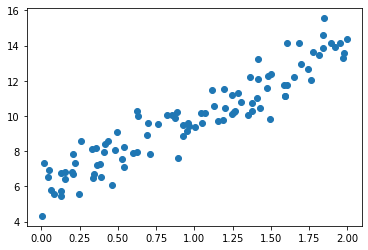

In [31]:
plt.scatter(X, y)

In [32]:
def get_cost(y, y_pred):
    N=len(y)
    cost=np.sum(np.square(y-y_pred))/N
    return cost

In [33]:
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N=len(y)
    w1_update=np.zeros_like(w1)
    w0_update=np.zeros_like(w0)
    y_pred=np.dot(X, w1.T)+w0
    diff=y-y_pred

    w0_factos=np.ones((N,1))
    
    w1_update=-(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update=-(2/N)*learning_rate*(np.dot(w0_factos.T, diff))

    return w1_update, w0_update

In [34]:
def gradient_descent_steps(X, y, iters=10000):
    w0=np.zeros((1,1))
    w1=np.zeros((1,1))

    for ind in range(iters):
        w1_update, w0_update=get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1=w1-w1_update
        w0=w0-w0_update

    return w1, w0

In [35]:
w1, w0=gradient_descent_steps(X, y, iters=1000)
print('w1: {0:.3f}, w0: {1:.3f}'.format(w1[0,0], w0[0,0]))
y_pred=w1[0,0]*X+w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.071, w0: 5.858
Gradient Descent Total Cost:0.7757


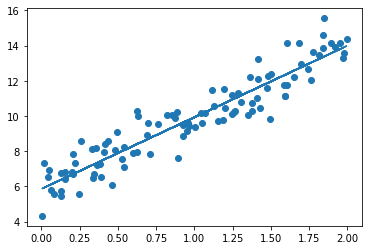

In [36]:
plt.scatter(X, y)
plt.plot(X, y_pred)

In [43]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0=np.zeros((1,1))
    w1=np.zeros((1,1))
    prec_cost=100000
    iter_index=0

    for ind in range(iters):
        np.random.seed(ind)
        stochastic_random_index=np.random.permutation(X.shape[0])
        sample_X=X[stochastic_random_index[0: batch_size]]
        sample_y=y[stochastic_random_index[0: batch_size]]

        w1_update, w0_update=get_weight_updates(w1, w0, sample_X, sample_y,                     learning_rate=0.01)
        w1=w1-w1_update
        w0=w0-w0_update

    return w1, w0

In [44]:
w1, w0=stochastic_gradient_descent_steps(X, y, iters=1000)
print('w1: ', round(w1[0,0], 3), 'w0 :', round(w0[0,0], 3))
y_pred=w1[0,0]*X+w0
print('Stochastic Gradient Descent Total Cost : {0:.4f}'.format(get_cost(y, y_pred)))

w1:  4.044 w0 : 5.857
Stochastic Gradient Descent Total Cost : 0.7764


In [45]:
from sklearn import linear_model

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('./auto-mpg.csv', header=None)
df.columns=['mpg', 'cylinders', 'displacement', 'horsepower','weight','accerlation', 'model year', 'origin', 'name']
pd.set_option('display.max_columns', 10)
df

,mpg,cylinders,displacement,horsepower,weight,accerlation,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   accerlation   398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [51]:
df.describe()

,mpg,cylinders,displacement,weight,accerlation,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [52]:
df['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [54]:
df['horsepower'].replace('?', np.nan, inplace=True)
df.dropna(subset=['horsepower'], axis=0, inplace=True)
df['horsepower']=df['horsepower'].astype('float')
df

,mpg,cylinders,displacement,horsepower,weight,accerlation,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [55]:
ndf=df[['mpg','cylinders','horsepower','weight']]
ndf

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0
...,...,...,...,...
393,27.0,4,86.0,2790.0
394,44.0,4,52.0,2130.0
395,32.0,4,84.0,2295.0
396,28.0,4,79.0,2625.0


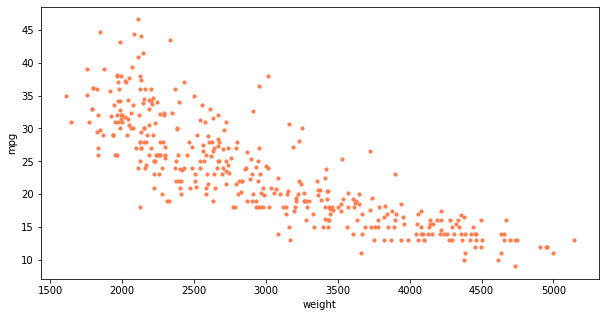

In [56]:
ndf.plot(kind='scatter',x='weight',y='mpg',c='coral',s=10, figsize=(10, 5))
plt.show()
plt.close()

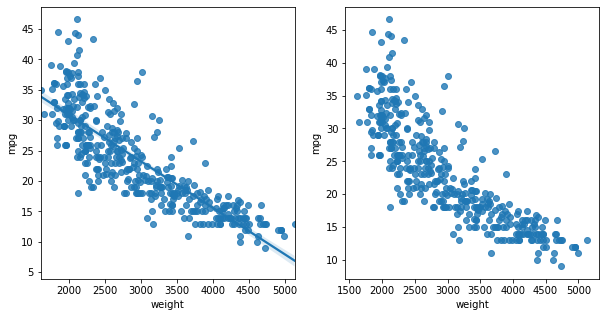

In [57]:
fig=plt.figure(figsize=(10, 5))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax1)
sns.regplot(x='weight',y='mpg', data=ndf, ax=ax2, fit_reg=False)
plt.show()
plt.close()

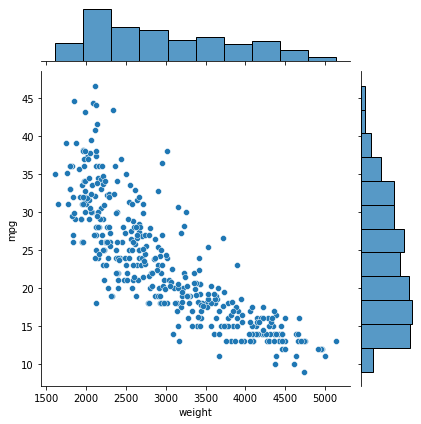

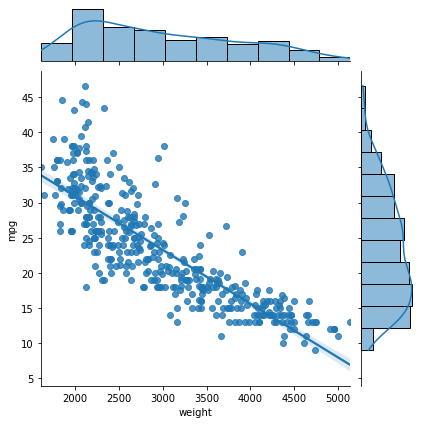

In [58]:
sns.jointplot(x='weight', y='mpg', data=ndf)
sns.jointplot(x='weight', y='mpg', kind='reg', data=ndf)
plt.show()
plt.close()

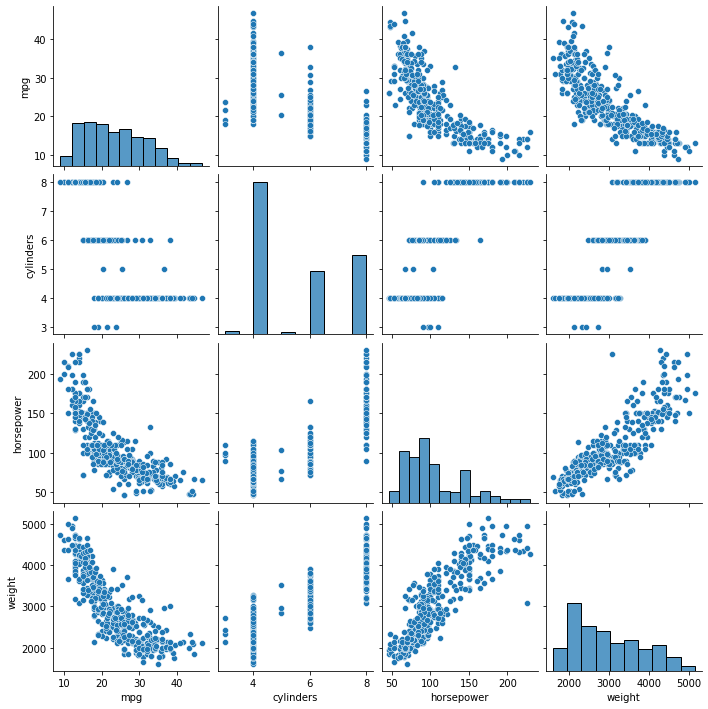

In [60]:
sns.pairplot(ndf)
plt.show()
plt.close()

In [62]:
X=ndf[['weight']]
y=ndf[['mpg']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=10)
print(len(X_train))
print(len(X_test))

274
118


In [65]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X_train, y_train)
r_square=lr.score(X_test, y_test)
print(r_square)
print('기울기 a : ', lr.coef_)
print('y 절편 b : ', lr.intercept_)

0.6822458558299325
기울기 a :  [[-0.00775343]]
y 절편 b :  [46.71036626]


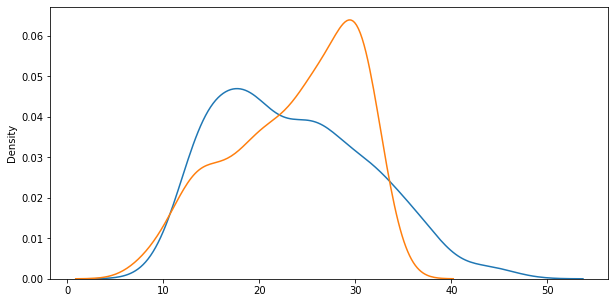

In [66]:
y_hat=lr.predict(X)
plt.figure(figsize=(10, 5))
ax1=sns.distplot(y, hist=False, label='y')
ax2=sns.distplot(y_hat, hist=False, label='y_hat', ax=ax1)
plt.show()
plt.close()

In [67]:
from scipy import stats
from sklearn.datasets import load_boston

In [99]:
boston=load_boston()
bostonDF=pd.DataFrame(boston.data, columns=boston.feature_names)
bostonDF['PRICE']=boston.target
print(bostonDF.shape)
bostonDF.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,...,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,...,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,...,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,...,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,...,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,...,222.0,18.7,396.90,5.33,36.2


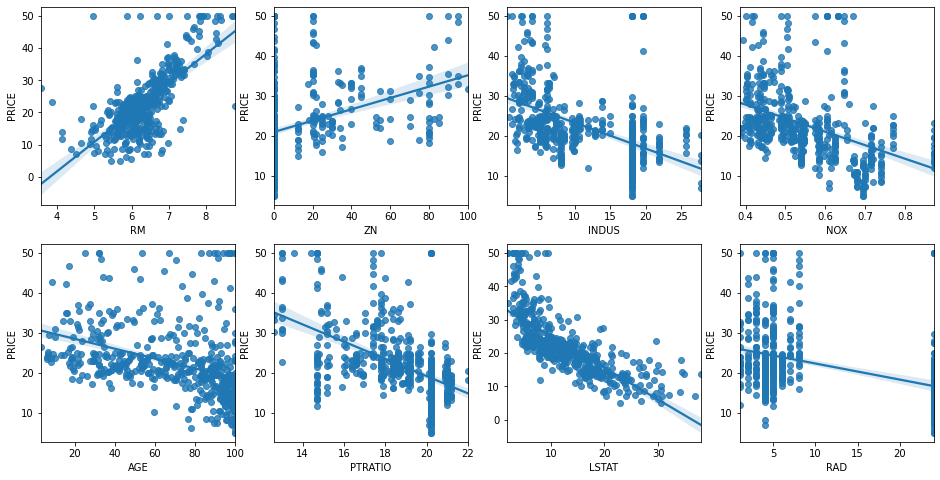

In [95]:
fig, axs=plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
lm_features=['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
    row=int(i/4)
    col=i%4
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

In [96]:
from sklearn.metrics import mean_squared_error, r2_score

In [100]:
y_target=bostonDF['PRICE']
bostonDF.drop(['PRICE'], axis=1, inplace=True)
X_data=bostonDF

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

lr=LinearRegression()
lr.fit(X_train, y_train)
y_preds=lr.predict(X_test)
mse=mean_squared_error(y_test, y_preds)
rmse=np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance Score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE : 4.159
Variance Score : 0.757


In [102]:
print('절편 값 : ', lr.intercept_)
print('회귀 계수 값 : ', np.round(lr.coef_, 1))

절편 값 :  40.9955951721646
회귀 계수 값 :  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [104]:
coeff=pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [110]:
from sklearn.model_selection import cross_val_score

lr=LinearRegression()

neg_mse_scores=cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

print(' 5 folds의 개별 Negative MSE scores : ', np.round(neg_mse_scores, 2))
print(' 5 folds의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds의 평균 RMSE : {0:.3f}'.format(avg_rmse))

 5 folds의 개별 Negative MSE scores :  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds의 평균 RMSE : 5.829


In [111]:
from sklearn.preprocessing import PolynomialFeatures

In [113]:
X=np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature : \n', X)
poly=PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr=poly.transform(X)
print('변환된 2차 다항식 계수 feature: \n', poly_ftr)

일차 단항식 계수 feature : 
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 feature: 
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [114]:
def polynomial_func(X):
    y=1+2*X[:,0]+3*X[:,0]**2+4*X[:,1]**3
    print(X[:,0])
    print(X[:,1])
    return y

X=np.arange(0,4).reshape(2,2)
print('일차 단항식 계수 feature:\n', X)
y=polynomial_func(X)
print('삼차 다항식 결정값: \n',  y)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
[0 2]
[1 3]
삼차 다항식 결정값: 
 [  5 125]


In [117]:
poly_ftr=PolynomialFeatures(degree=3).fit_transform(X)
model=LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수\n', np.round(model.coef_, 2))
print('Polynomial 회귀 shape :', model.coef_.shape)

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 shape : (10,)


In [118]:
from sklearn.pipeline import Pipeline

In [119]:
def polynomial_func(X):
    y=1+2*X[:,0]+3*X[:,0]**2+4*X[:,1]**3
    return y

In [120]:
model=Pipeline([('poly', PolynomialFeatures(degree=3)), ('linear', LinearRegression())])
X=np.arange(4).reshape(2,2)
y=polynomial_func(X)
model=model.fit(X, y)

In [123]:
print('Polynomial 회귀 계수 \n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


In [124]:
df=pd.read_csv('./auto-mpg.csv')
df.columns=['mpg', 'cylinders', 'displacement', 'horsepower','weight','accerlation', 'model year', 'origin', 'name']
df['horsepower'].replace('?', np.nan, inplace=True)
df.dropna(subset=['horsepower'], axis=0, inplace=True)
df['horsepower']=df['horsepower'].astype('float')

In [126]:
ndf=df[['mpg', 'cylinders', 'horsepower','weight']]

X=ndf[['weight']]
y=ndf[['mpg']]

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=10)

print(X_train.shape)
print(X_test.shape)

(273, 1)
(118, 1)


In [128]:
poly=PolynomialFeatures(degree=2)
X_train_poly=poly.fit_transform(X_train)

In [129]:
pr=LinearRegression()
pr.fit(X_train_poly, y_train)
X_test_poly=poly.fit_transform(X_test)
r_square=pr.score(X_test_poly, y_test)
print(r_square)

0.7337822241594376


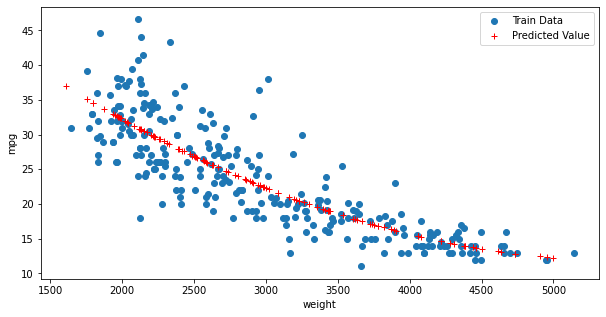

In [132]:
y_hat_test=pr.predict(X_test_poly)
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(1,1,1)
ax.plot(X_train, y_train, 'o', label='Train Data')
ax.plot(X_test, y_hat_test, 'r+', label='Predicted Value')
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
plt.close()

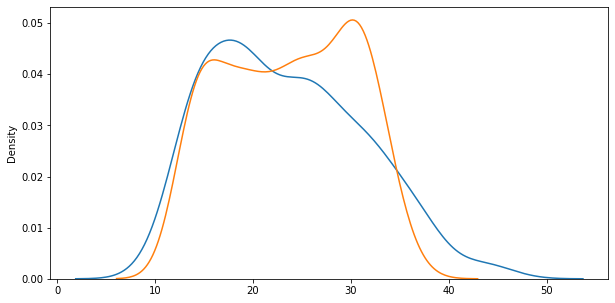

In [133]:
X_poly=poly.fit_transform(X)
y_hat=pr.predict(X_poly)
plt.figure(figsize=(10,5))
ax1=sns.distplot(y, hist=False, label='y')
ax2=sns.distplot(y_hat, hist=False, label='y_hat', ax=ax1)
plt.show()
plt.close()

In [134]:
def true_fun(X):
    return np.cos(1.5*np.pi*X)

In [135]:
np.random.seed(0)
n_samples=30
X=np.sort(np.random.rand(n_samples))
y=true_fun(X)+np.random.randn(n_samples)*0.1


Degree 1 회귀 계수는 [-2.] 입니다.
Degree 1 MSE는 0.41 입니다.


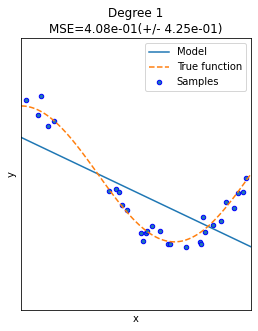


Degree 4 회귀 계수는 [  0. -18.  24.  -7.] 입니다.
Degree 4 MSE는 0.04 입니다.


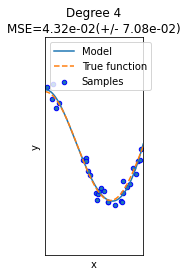


Degree 15 회귀 계수는 [-2.98300000e+03  1.03899000e+05 -1.87415300e+06  2.03715480e+07
 -1.44872835e+08  7.09313514e+08 -2.47065254e+09  6.24559926e+09
 -1.15676340e+10  1.56894750e+10 -1.54005880e+10  1.06457188e+10
 -4.91377277e+09  1.35919599e+09 -1.70380755e+08] 입니다.
Degree 15 MSE는 180513241.06 입니다.


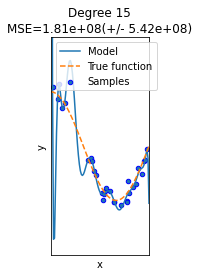

In [143]:
plt.figure(figsize=(14, 5))
degrees=[1, 4, 15]
for i in range(len(degrees)):
    ax=plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())
    polynomial_features=PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression=LinearRegression()
    pipeline=Pipeline([('polynomial_features', polynomial_features),           
    ('linear_regression', linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    scores=cross_val_score(pipeline, X.reshape(-1, 1), y,                             scoring='neg_mean_squared_error', cv=10)
    coefficients=pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients),2))
    print('Degree {0} MSE는 {1:.2f} 입니다.'.format(degrees[i], -1*np.mean(scores)))
    X_test=np.linspace(0,1,100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label='Model')
    plt.plot(X_test, true_fun(X_test), '--', label='True function')
    plt.scatter(X, y, edgecolor='b', s=20, label='Samples')
    plt.xlabel('x');plt.ylabel('y');plt.xlim((0,1));plt.ylim((-2,2));plt.legend(loc='best')
    plt.title('Degree {}\nMSE={:.2e}(+/- {:.2e})'.format(degrees[i], -scores.mean(), scores.std()))
    plt.show()

fig=plt.figure(figsize=(12, 10))
plt.style.use('seaborn-whitegrid')

for i, degree in enumerate([1,4,15], start=1):
    ax=fig.add_subplot(2,2,1)
    ax.scatter(X, y, s=15)

    y_test=Pipeline([('poly', PolynomialFeatures(degree)), ('linear', LinearRegression())]).fit(X,y).predict(X_test)

    ax.plot(X_test, y_test, label='degree={0}'.format(degree))
    ax.set_xlim(-0.1, 1.0)
    ax.set_ylim(-2, 12)
    ax.legend(loc='best')